# 4 Logistic回归
### Logistic回归的一般过程
### （1）收集数据：采用任意方法收集数据。
### （2）准备数据：由于需要进行距离计算，因此要求数据类型为数值型。（有限）另外，结构化数据格式则最佳。
### （3）分析数据： 采用任意方法对数据进行分析。
### （4）训练算法：大部分时间将用于训练，训练的目的是为了找到最佳的分类回归系数
### （5）测试算法：一旦训练完成，分类将会很快。
### （6）使用算法：首先，我们需要输入一些数据，并将起转化成对应的结构化数值。接着，基于训练好的回归系数既可以    对这些数值进行简单的回归计算，在这之后，我们就可以在输出的类别上做一些其他分析工作。

## 4.1 基于Logistic回归和Sigmoid函数分类
### Logistic回归
### 优点：计算代价不高，易于理解和实现。
### 缺点：容易欠拟合，分类精度可能不高。
### 使用数据类型：数值型和标称型数据。

### 梯度上升法的伪代码
    每个回归系数初始化为1
    重复R次：
        计算整个数据集的梯度
        使用alpha×gradient更新回归系数的向量
    返回回归系数
### 4-1 Logistic回归梯度上升优化方法

In [23]:
from numpy import *
def loadDataSet():   # 加载数据集
    dataMat = []  # 创建数据列表
    labelMat = []  # 创建标签列表
    fr = open('testSet.txt')  # 打开测试数据文件
    for line in fr.readlines():  # 读取文件每一行
        lineArr = line.strip().split()  # 除去每一行的空格后拆分成列表， 例如 ['0.317029', '14.739025', '0']
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])  # 增加子列表，[1.0,lineArr第一个元素（float）,lineArr第二个元素（float）]
        labelMat.append(int(lineArr[2]))  # 添加元素，元素来源于 lineArr列表的第三个元素（transform str to int first）         
    return dataMat, labelMat  # 返回数据列表，标签列表

# 注：[1.0, float(lineArr[0]), float(lineArr[1])] 中的1.0 表示的是特征X0 的值，一般默认X0 = 1.0（or 1）
def sigmoid(inX):   # 定义sigmoid函数， 同书P74
    return 1.0/(1+exp(-inX))

def gradAscent(dataMatIn, classLabels):  # 定义梯度上升函数
    dataMatrix = mat(dataMatIn)   # 把数据列表转化成矩阵形式（列表和矩阵的简单差别：列表一般是一行，以逗号分隔，而矩阵是多行，没逗号）
    labelMat = mat(classLabels).transpose()  # 把标签列表转化成矩阵形式，然后转置 （行向量 -> 列向量）
    m,n = shape(dataMatrix)   # 取 数据矩阵的行和列   第一个是 行数m=100， 第二个是 列数n=3 
    alpha = 0.001   # 学习率初始化 = 0.001
    maxCycles = 500   # 最大循环次数 = 500
    weights = ones((n,1))  # 权重初始化为 = 0.0   列向量（形式为n行1列）
    for k in range(maxCycles):  
        h = sigmoid(dataMatrix * weights)  # 1.0/(1+exp(-Z)    f[x,y] = Z = dataMatrix * weights
        error = (labelMat - h)
        weights = weights + alpha * dataMatrix.transpose() * error  # 更新权重  
    return weights  # 返回 权重

In [33]:
dataArr, labelMat = loadDataSet()
dataMatrix = mat(dataArr)
#print(dataMatrix)
res = gradAscent(dataArr,labelMat)
print(res)

[[ 4.12414349]
 [ 0.48007329]
 [-0.6168482 ]]


### 4-2 画出数据集和Logistic回归最佳你和直线的函数

In [25]:
def plotBestFit(weights):
    import matplotlib.pyplot as plt
    dataMat, labelMat = loadDataSet()  # 赋值数据列表， 标签列表（元素只有1 和 0）
    dataArr = array(dataMat)  # array(dataMat) 不等于 mat(dataMat),但是形式上好像一样
    n = shape(dataArr)[0]  # n=100  数组的行n=100，（数组的列m=3）
    xcord1 = []  
    ycord1 = []
    xcord2 = []
    ycord2 = []
    for i in range(n):  # 遍历 （0->100-1）
        if int(labelMat[i]) == 1:   # 如果第i个元素的标签值是 1
            xcord1.append(dataArr[i,1])   # 把对应数据数组（形似矩阵）的第i行的第2个元素 增加到 xcord1
            ycord1.append(dataArr[i,2])   # 把对应数据数组（形似矩阵）的第i行的第3个元素 增加到 ycord1
        else:   # 如果标签列表（labelMat）中第i个元素的标签是 0
            xcord2.append(dataArr[i,1])   # 同上 
            ycord2.append(dataArr[i,2])   # 同上
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
    ax.scatter(xcord2, ycord2, s=30, c='green')
    # 绘制拟合直线
    x = arange(-3.0,3.0,0.1)  # x取值范围 起点-3.0， 终点3.0 步长0.1 
    y = (-weights[0]-weights[1]*x)/weights[2]  # weight[1]是1*1的矩阵
    ax.plot(x,y)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()

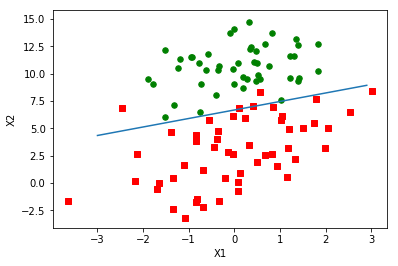

In [26]:
from numpy import *  ### why do in this way ???
# import numpy
dataArr, LabelMat = loadDataSet()
weights = gradAscent(dataArr,LabelMat)
plotBestFit(weights.getA())  # #将numpy矩阵转换为数组
# what is getA() ???  结果如下
# print(type(weights))  <class 'numpy.matrixlib.defmatrix.matrix'>

### 4-3 随机梯度上升算法
#### #注：和梯度上升法的区别：第一，后者的变量h和error都是向量，而前者则全是数值；第二，前者没有矩阵的转化过程，所有变量的数据类型都是Numpy数组

In [27]:
def stocGradAscent0(dataMatrix, classLabels):
    m,n = shape(dataMatrix)  # 取数组的行m， 列n
    alpha = 0.01  # 学习率初始化
    weights = ones(n)   # 创建 含有 n 个元素的 数组
    for i in range(m): # 循环每一行的元素
        h = sigmoid(sum(dataMatrix[i]*weights))   # 1.0/(1+exp(-Z)   # h 是向量
        error = classLabels[i] - h 
        weights = weights + alpha * error * dataMatrix[i]    # 更新权重
    return weights   # 返回权重

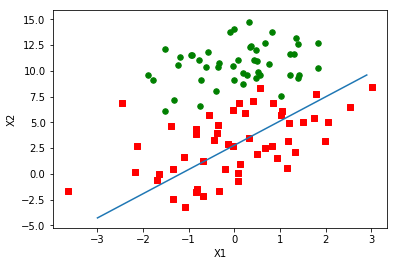

In [28]:
from numpy import *
dataArr,labelMat = loadDataSet()
weights = stocGradAscent0(array(dataArr), labelMat)
plotBestFit(weights) 

### 4-4 改进的随机梯度上升算法

In [29]:
def stocGradAscent1(dataMatrix, classLabels, numIter = 150):
    m,n = shape(dataMatrix)   # 取数组（narray）的行，列 m=100， n=3  （narray 和 matrix 长的一样）
    weights = ones(n)  # [1. 1. 1.]
    for j in range(numIter):  # 循环到 最大循环次数numIter = 150：
        # dataIndex = range(m) ### 书中需要更改的地方  tip: TypeError: 'range' object doesn't support item deletion
        dataIndex = list(range(m))  # 创建一个0到99， 步长为1 的列表
        for i in range(m):   # 循环listIndex
            alpha = 4/(1.0+j+i)+0.01
            randIndex = int(random.uniform(0, len(dataIndex)))   # 随机整数值，返回 0 到 m - 1（这里是99）
            h = sigmoid(sum(dataMatrix[randIndex]*weights))   #  1.0/(1+exp(-Z))    Z = dataMatrix * weights
            error = classLabels[randIndex] - h
            weights = weights + alpha * error * dataMatrix[randIndex]   # 更新权重
            del(dataIndex[randIndex])   # 删除用过的 随机数 （避免重复）
    return weights   # 返回权重

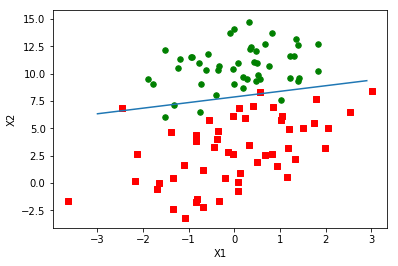

In [30]:
from numpy import *
dataArr,labelMat = loadDataSet()
weights = stocGradAscent1(array(dataArr), labelMat)
plotBestFit(weights) 

# 示例：从疝气病症预测病吗的死亡率

### 4-5 Logistic回归分类函数

In [35]:
def classifyVector(inX, weights):
    prob = sigmoid(sum(inX*weights))  # 输入Z=inX*weights（特征向量*回归系数） 计算Sigmoid值
    if prob > 0.5:
        return 1.0
    else:
        return 0.0

def colicTest():
    frTrain = open('horseColicTraining.txt')   # 打开训练集
    frTest = open('horseColicTest.txt')   # 打开测试集
    trainingSet = []   # 训练集列表
    trainingLabels = []   # 训练标签列表
    for line in frTrain.readlines():   # 读取训练文本的 每一行 
        currLine = line.strip().split('\t')   # 除去空格，然后用split方法 转化 成list
        lineArr = []   # 定义行数组（处理每行数据）
        for i in range(21):  #数据有22列，前21个为特征，最后一个是分类标签
            lineArr.append(float(currLine[i]))  # 添加currLine的第i个元素到lineArr
        trainingSet.append(lineArr)   # 把 lineArr 作为 子列表 添加到 训练集列表trainingSet
        trainingLabels.append(float(currLine[21]))  #  把 currLine 最后一个元素（是标签） 添加到训练标签trainingLabels
    trainWeights = stocGradAscent1(array(trainingSet),trainingLabels,500)   # 迭达500次 求 训练权重
    errorCount = 0
    numTestVec = 0.0
    for line in frTest.readlines():   # 读取测试文本的每一行
        numTestVec += 1.0  # numTestVec == 1.0
        currLine = line.strip().split('\t')  # 除去空格，然后用split方法 转化 成list
        lineArr = []    # 定义行数组（处理每行数据）
        for i in range(21):  # 数据有22列，前21个为特征，最后一个是分类标签
            lineArr.append(float(currLine[i]))   # 添加currLine的第i个元素到lineArr
        if int(classifyVector(array(lineArr), trainWeights)) != int(currLine[21]):  # 如果分类有错误
            errorCount += 1
    errorRate = (float(errorCount)/numTestVec)   # 计算错误率
    print("the error rate of this test is: %f" % errorRate)
    return errorRate
    # errorCount,numTestVec 各变量结果  25, 67.0

def multiTest():    # 调用colicTest（）函数10次并求平均值
    numTests = 10
    errorSum = 0.0
    for k in range(numTests):
        errorSum += colicTest()
    print("after %d iterations the average error rate is: %f" % (numTests, errorSum/float(numTests)))

In [36]:
print(colicTest())
multiTest()

c:\users\dell\appdata\local\juliapro-0.6.4.1\python\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in exp
  


the error rate of this test is: 0.313433
0.31343283582089554
the error rate of this test is: 0.343284
the error rate of this test is: 0.432836
the error rate of this test is: 0.343284
the error rate of this test is: 0.388060
the error rate of this test is: 0.283582
the error rate of this test is: 0.432836
the error rate of this test is: 0.358209
the error rate of this test is: 0.373134
the error rate of this test is: 0.373134
the error rate of this test is: 0.358209
after 10 iterations the average error rate is: 0.368657
